this code is about the classification of the chest CT images into one of the four cancerous conditions namely adenocarcinoma, large cell carcinoma, squamous cell carcinoma and normal.

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
import scipy

2022-12-01 23:14:51.915930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
path = './../project_local/10-617-Project'

In [6]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [7]:
train_generator = train_datagen.flow_from_directory(
    f'{path}/Data/train',
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')
    
validation_generator = val_datagen.flow_from_directory(
    f'{path}/Data/valid',
    target_size = (224,224),
    batch_size = 1,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    f'{path}/Data/test',
    target_size = (224,224),
    batch_size = 1,
    shuffle=True,
    class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


I have developed a transfer learning based EfficientNetB3 model that has been trained on imagenet dataset. I have added some additional layers to the basic model.

In [8]:
base_model = EfficientNetB0(weights='imagenet', classifier_activation="softmax", include_top=False)

print(len(base_model.layers))
for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D(name="gap"))
model.add(Dense(4, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

2022-12-01 23:15:55.772539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16705208/16705208 [==============================] - 1s 0us/step
238
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


In [9]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [10]:

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    )

Epoch 1/30
20/20 [==============================] - 111s 5s/step - loss: 4.0530 - accuracy: 0.3426 - auc: 0.6018 - precision: 0.3422 - recall: 0.3361 - val_loss: 5.8871 - val_accuracy: 0.2917 - val_auc: 0.4989 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 2/30
20/20 [==============================] - 85s 4s/step - loss: 3.3695 - accuracy: 0.3980 - auc: 0.6291 - precision: 0.4072 - recall: 0.3866 - val_loss: 5.4702 - val_accuracy: 0.2917 - val_auc: 0.5389 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 3/30
20/20 [==============================] - 80s 4s/step - loss: 2.8767 - accuracy: 0.4062 - auc: 0.6609 - precision: 0.4131 - recall: 0.3915 - val_loss: 4.9119 - val_accuracy: 0.2639 - val_auc: 0.5104 - val_precision: 0.2714 - val_recall: 0.2639
Epoch 4/30
20/20 [==============================] - 85s 4s/step - loss: 2.2171 - accuracy: 0.4584 - auc: 0.7120 - precision: 0.4646 - recall: 0.4388 - val_loss: 4.5207 - val_accuracy: 0.3194 - val_auc: 0.5577 - val_precision: 0.3286 - va

In [11]:
print(history.history.keys())
h = history.history
print(h['val_accuracy'])

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])
[0.2916666567325592, 0.2916666567325592, 0.2638888955116272, 0.3194444477558136, 0.2916666567325592, 0.3194444477558136, 0.2916666567325592, 0.4027777910232544, 0.3888888955116272, 0.4027777910232544, 0.4305555522441864, 0.4722222089767456, 0.4444444477558136, 0.5, 0.4861111044883728, 0.4722222089767456, 0.5, 0.4027777910232544, 0.5416666865348816, 0.4583333432674408, 0.5555555820465088, 0.4305555522441864, 0.5555555820465088, 0.4583333432674408, 0.5138888955116272, 0.4166666567325592, 0.5555555820465088, 0.4861111044883728, 0.5138888955116272, 0.5138888955116272]


['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall']
loss loss val_loss


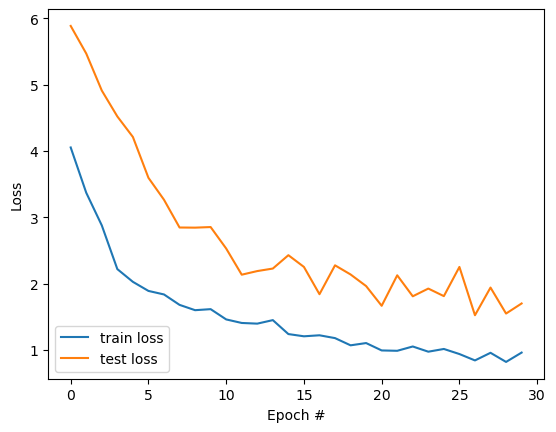

accuracy accuracy val_accuracy


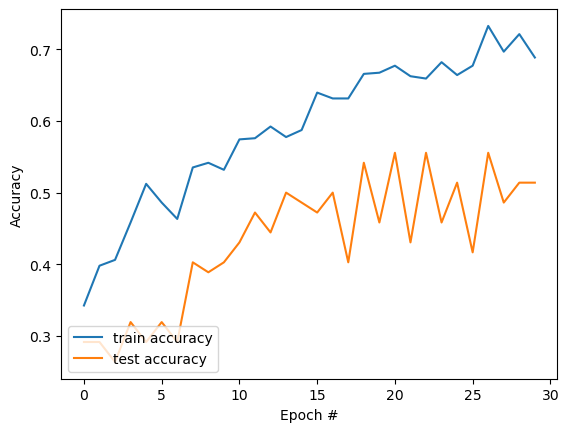

precision auc val_auc


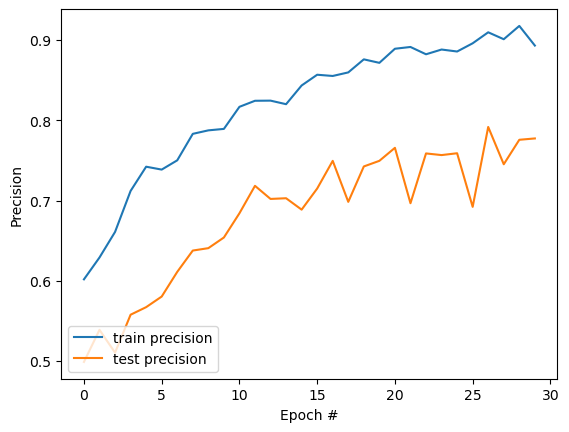

recall recall val_recall


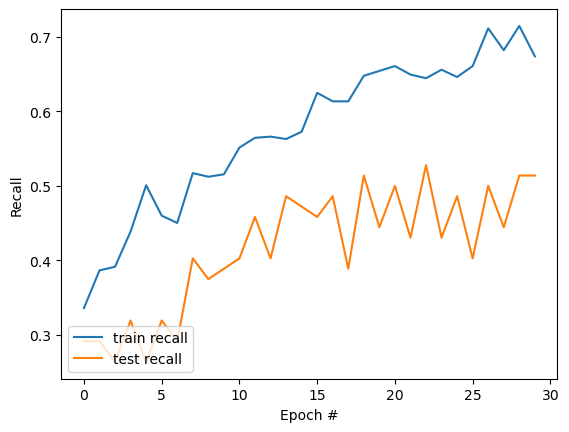

<Figure size 640x480 with 0 Axes>

In [12]:
hdict = history.history
keys = list(hdict.keys())
print(keys)
def graph(name, index):
    print(name, keys[index], keys[(len(keys) // 2) + index])
    train_metric, test_metric = hdict[keys[index]], hdict[keys[(len(keys) // 2) + index]]
    epochs = len(train_metric)
    x = list(range(epochs))

    plt.plot(x, train_metric, label=f'train {name}')
    plt.plot(x, test_metric, label=f'test {name}')

    plt.xlabel('Epoch #')
    plt.ylabel(name.capitalize())
    plt.legend(loc='lower left')
    plt.savefig(f'./initial_plots/{name}.png')
    plt.show()
    plt.clf()

graph('loss', 0)
graph('accuracy', 1)
graph('precision', 2)
graph('recall', 4)

In [13]:
model.evaluate(train_generator)

20/20 [==============================] - 17s 818ms/step - loss: 1.0193 - accuracy: 0.6819 - auc: 0.8827 - precision: 0.6970 - recall: 0.6754


[1.0192867517471313,
 0.6818923354148865,
 0.8827418088912964,
 0.6969696879386902,
 0.6753670573234558]

In [14]:
model.evaluate(validation_generator)


72/72 [==============================] - 3s 40ms/step - loss: 1.5800 - accuracy: 0.5278 - auc: 0.8044 - precision: 0.5286 - recall: 0.5139


[1.5800238847732544,
 0.5277777910232544,
 0.8043981790542603,
 0.5285714268684387,
 0.5138888955116272]

In [15]:
model.evaluate(test_generator)
# loss, 'accuracy','AUC','Precision','Recall'

315/315 [==============================] - 13s 41ms/step - loss: 1.5708 - accuracy: 0.5460 - auc: 0.7936 - precision: 0.5574 - recall: 0.5397


[1.5708054304122925,
 0.5460317730903625,
 0.7935735583305359,
 0.5573770403862,
 0.5396825671195984]

In [16]:
# from keras.preprocessing import image
# img = image.load_img('/content/Data/valid/squamous_cell_carcinoma_left.lower.lobe_T2_N0_M0_Ib/000117 (6).png',target_size=(224,224))
# imag = image.img_to_array(img)
# imaga = np.expand_dims(imag,axis=0) 
# ypred = model.predict(imaga)
# print(ypred)
# a=np.argmax(ypred,-1)
# if a==0:
#   op="Adenocarcinoma"
# elif a==1:
#   op="large cell carcinoma"
# elif a==2:
#   op="normal (void of cancer)"
# else:
#   op="squamous cell carcinoma"    
# plt.imshow(img)
# print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  


In [17]:
tf.keras.models.save_model(model,'mymodel.hdf5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.